In [1]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("notebook", font_scale=1.5)
sns.set_style("darkgrid", {'axes.grid' : False})   

%matplotlib inline

In [2]:
drive_path = '/Volumes/Brain2016 1/'

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_path = os.path.join(drive_path,'BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

## example code to extract useful stuff, then plot response triggered average image

### get metrics for all cell_specimens in the dataset

In [4]:
#get cell metrics dataframe
cell_specimen_df = pd.DataFrame(boc.get_cell_specimens(ids=None,experiment_container_ids=None))
cell_specimen_df.head()

area  cell_specimen_id    dsi_dg  experiment_container_id  imaging_depth  \
0  VISpm         517394843       NaN                511498500            275   
1  VISpm         517394850       NaN                511498500            275   
2  VISpm         517394858  0.592835                511498500            275   
3  VISpm         517394866  0.599360                511498500            275   
4  VISpm         517394870       NaN                511498500            275   

     osi_dg    osi_sg      p_dg          p_ns      p_sg         ...          \
0       NaN  0.728590       NaN  2.644073e-05  0.000076         ...           
1       NaN  0.899272       NaN  3.568235e-04  0.056579         ...           
2  1.150344       NaN  0.002900           NaN       NaN         ...           
3  0.745139       NaN  0.000004           NaN       NaN         ...           
4       NaN  0.599881       NaN  3.334354e-07  0.067868         ...           

   pref_sf_sg  pref_tf_dg  time_to_peak_ns  time_to_peak_sg    tld1_id  \
0        0.32         NaN          0.29925          0.19950  177839004   
1        0.32         NaN          0.43225          0.56525  177839004   
2         NaN         8.0              NaN              NaN  177839004   
3         NaN         8.0              NaN              NaN  177839004   
4        0.02         NaN          0.23275          0.39900  177839004   

      tld1_name    tld2_id   tld2_name    tlr1_id           tlr1_name  
0  Cux2-CreERT2  177837320  Camk2a-tTA  265943423  Ai93(TITL-GCaMP6f)  
1  Cux2-CreERT2  177837320  Camk2a-tTA  265943423  Ai93(TITL-GCaMP6f)  
2  Cux2-CreERT2  177837320  Camk2a-tTA  265943423  Ai93(TITL-GCaMP6f)  
3  Cux2-CreERT2  177837320  Camk2a-tTA  265943423  Ai93(TITL-GCaMP6f)  
4  Cux2-CreERT2  177837320  Camk2a-tTA  265943423  Ai93(TITL-GCaMP6f)  

[5 rows x 24 columns]

### get experiment containers meeting certain criteria

In [5]:
#get experiment_containers meeting certain criteria
expts = boc.get_ophys_experiments(targeted_structures=['VISl'],cre_lines=['Cux2-CreERT2'],
                                  imaging_depths=[275],session_types=['three_session_B'])
expts = pd.DataFrame(expts)
print len(expts),'experiments meet these criteria'
expts.head()

3 experiments meet these criteria


age_days      cre_line  experiment_container_id         id  imaging_depth  \
0     101.0  Cux2-CreERT2                511510870  509799475            275   
1     106.0  Cux2-CreERT2                511510848  507691834            275   
2     108.0  Cux2-CreERT2                511510945  507691735            275   

      session_type targeted_structure  
0  three_session_B               VISl  
1  three_session_B               VISl  
2  three_session_B               VISl

In [6]:
#get experiment session id for the first experiment container
session_id = expts.id.values[0]
print session_id

509799475


### get data_set for one experiment session

In [7]:
#get data for a single experiment session
data_set = boc.get_ophys_experiment_data(ophys_experiment_id = session_id)

In [8]:
#get stimulus template (aka stimulus frames) for images, movies or locally sparse noise
images = data_set.get_stimulus_template(stimulus_name='natural_scenes')
images.shape

(118, 918, 1174)

In [9]:
#get stimulus table
stim_table = data_set.get_stimulus_table('natural_scenes')
stim_table.head()

frame  start    end
0     20  16097  16104
1     72  16105  16111
2     19  16112  16119
3    101  16119  16127
4     41  16127  16134

### stimulus specific analysis - natural_scenes

In [10]:
#stimulus specific analysis
from allensdk.brain_observatory.natural_scenes import NaturalScenes
ns = NaturalScenes(data_set)

In [11]:
#sweep_response table - dataframe of dF/F traces for every sweep (rows) for all cells (columns)
#trace includes interlength+sweeplength+interlength
sweep_response = ns.sweep_response

In [12]:
#mean_sweep_response - mean values of traces in sweep_response during stimulus window
#sweep (rows) by cells (columns)
mean_sweep_response = ns.mean_sweep_response 
mean_sweep_response.head()

0         1         2         3         4          5          6  \
0  12.418274  5.871527  5.599794  3.815869  0.526053   2.228843   6.028367   
1   3.007397  2.774787  5.359518  3.632038  7.841802  11.439992  13.729432   
2  -3.345307 -0.579120  0.882733 -0.026673  3.049661   7.374558  11.693105   
3  -8.496967 -1.653206 -5.240768 -2.810840 -2.951620   1.377301  -0.515395   
4  -8.343891 -2.779307 -7.162851 -2.376591 -6.510853  -3.276185  -9.286360   

          7         8         9    ...          251        252       253  \
0  1.190621  1.674653  1.637678    ...     4.048636 -13.329226  4.450078   
1  2.653048  5.658538  2.198213    ...     1.932141 -11.852395  4.516848   
2  1.272825  6.266379  0.264762    ...     3.115331 -11.673634  1.662271   
3  5.196257  1.116533 -0.385984    ...    -0.033214 -10.316792 -2.065676   
4  3.195860 -6.714207  2.544935    ...     1.025769  -5.917578 -1.153925   

        254       255        256       257       258         259        dx  
0  1.508602  1.732629   3.184081 -1.651238  3.670427    4.011465  0.035566  
1  3.014580  5.812439  10.940842 -1.666248  3.564546    6.499575 -0.191310  
2  2.039587  0.877686  15.653689 -3.988073  0.218606   57.703552 -0.158952  
3  4.824219 -5.383786   7.624096 -9.433590 -3.087440  102.370705  0.047478  
4  2.687200 -8.852141  -5.735470 -9.441893 -3.338022    8.743225  0.055797  

[5 rows x 261 columns]

In [13]:
#get mean response across conditions (conditions, cells, 3)
#for natural scenes, array is (#scenes, #cells, 3)
#last dimension is, for each condition: mean response, sem, p-value 
condition_response = ns.response
condition_response.shape

(119, 261, 3)

In [14]:
#mean response for all image conditions for cell 
cell = 0
mean_image_responses = condition_response[:,cell,0] #[image,cell,mean]

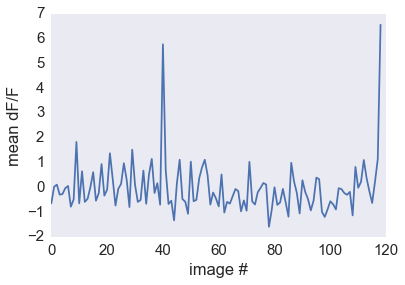

In [15]:
plt.plot(mean_image_responses)
plt.xlabel('image #')
plt.ylabel('mean dF/F')

### find pref image & plot mean response to that image

In [16]:
cell = ns.peak[ns.peak.peak_dff_ns>=3].cell_specimen_id.values[0]
cell

517488841

In [17]:
pref_scene = ns.peak[ns.peak.cell_specimen_id==cell].scene_ns.values[0]
pref_scene

117

In [18]:
pref_scene_sweeps = ns.stim_table[ns.stim_table.frame==pref_scene].index.values
pref_scene_sweeps

array([ 448,  550,  669,  691,  871,  920,  931, 1142, 1408, 1436, 1626,
       1754, 1759, 1817, 1953, 1962, 1968, 2371, 2472, 2483, 2742, 2759,
       2943, 3097, 3214, 3218, 3231, 3367, 3368, 3498, 3678, 3837, 3927,
       3980, 4209, 4404, 4411, 4455, 4581, 4721, 4742, 4904, 4960, 5112,
       5144, 5179, 5356, 5509, 5719, 5903])

In [19]:
#if the mean of the mean response to the preferred condition is > 5%
responsive_cells = ns.peak[ns.peak.peak_dff_ns>=5].cell_specimen_id.values
len(responsive_cells)

114

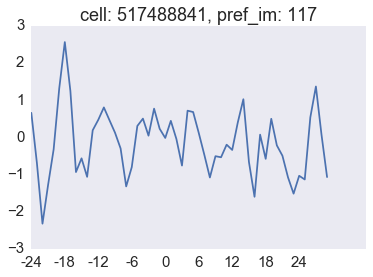

In [20]:
responsive_cell_id = 1
cell_specimen_id = responsive_cells[responsive_cell_id]
cell_idx = np.where(ns.cell_id==cell_specimen_id)[0][0]
pref_scene = ns.peak[ns.peak.cell_specimen_id==cell].scene_ns.values[0]
pref_scene_sweeps = ns.stim_table[ns.stim_table.frame==pref_scene].index.values

condition_mean = ns.sweep_response[str(cell_idx)].iloc[pref_scene_sweeps].mean()
frames = ns.sweeplength+ns.interlength*2
t = np.arange(0,frames)
t_int = np.arange(0,frames,6)
t_int_ref = t_int - ns.interlength 

fig,ax = plt.subplots()
ax.plot(t,condition_mean)
ax.set_xticks(t_int);
ax.set_xticklabels(t_int_ref);
# ax.set_xlabel('time after stimulus onset')
# ax.set_ylabel('dF/F')
ax.set_title('cell: '+str(cell)+', pref_im: '+str(pref_scene))

### make it a function

In [21]:
images = data_set.get_stimulus_template('natural_scenes')

In [22]:
def plot_pref_condition_response(ns,cell_specimen_id,images):
    pref_scene = ns.peak[ns.peak.cell_specimen_id==cell_specimen_id].scene_ns.values[0]
    pref_scene_sweeps = ns.stim_table[ns.stim_table.frame==pref_scene].index.values
#     cell_idx = data_set.get_cell_specimen_indices([cell])[0]
    cell_idx = np.where(ns.cell_id==cell_specimen_id)[0][0]

    condition_mean = ns.sweep_response[str(cell_idx)].iloc[pref_scene_sweeps].mean()
    frames = ns.sweeplength+ns.interlength*2
    t = np.arange(0,frames)
    t_int = np.arange(0,frames,6)
    t_int_ref = t_int - ns.interlength 

    fig,ax = plt.subplots(1,2,figsize=(12,4))
    ax = ax.ravel()
    ax[0].plot(t,condition_mean)
    ax[0].set_xticks(t_int);
    ax[0].set_xlim([np.min(t_int),np.max(t_int)])
    ax[0].set_xticklabels(t_int_ref/30.);
    ax[0].set_xlabel('time after stimulus onset')
    ax[0].set_ylabel('dF/F')
    ax[0].set_title('cell: '+str(cell))
    
    ax[1].imshow(images[pref_scene,:,:],cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('pref image: '+str(pref_scene))

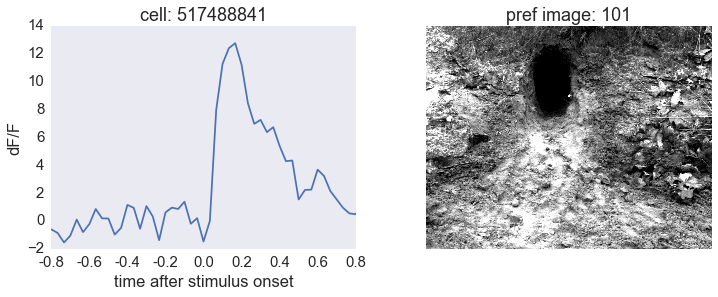

In [23]:
plot_pref_condition_response(ns,cell_specimen_id,images)

### find frames where response was greater than threshold dF/F value and determine which images were shown during those frames, then create response triggered average image, weighted by stength of response during those frames

In [24]:
#for a given cell in the list of responsive cells computed above
responsive_cell_id = 1
cell_specimen_id = responsive_cells[responsive_cell_id]
cell_idx = np.where(ns.cell_id==cell_specimen_id)[0][0]

In [25]:
#get traces for all responsive cells (not all cells in experiment_session)
timestamps,traces = data_set.get_dff_traces(cell_specimen_ids=responsive_cells)

In [26]:
#create array containing just the imaging frames when natural images were shown (frames_arr), 
#and and array of the natural images that were shown for those frames (images_arr)
frames_arr = np.empty(0)
images_arr = np.empty(0)
for sweep in range(len(stim_table)):
    start = stim_table.iloc[sweep].start
    end = stim_table.iloc[sweep].end
    frames = np.arange(start,end+1)
#     print frames.shape
    frames_arr = np.hstack((frames_arr,frames))
    image = stim_table.iloc[sweep].frame
    for i in range(len(frames)):
        images_arr = np.hstack((images_arr,image))

In [27]:
#for all responsive cells, get the dF/F values for frames where natural images were shown
traces_arr = np.empty((traces.shape[0],frames_arr.shape[0]))
for t in range(traces.shape[0]): 
    trace = np.empty(0)
    for sweep in range(len(stim_table)):
        start = stim_table.iloc[sweep].start
        end = stim_table.iloc[sweep].end
        tmp = traces[t,start:end+1]
        trace = np.hstack((trace,tmp))
    traces_arr[t,:] = trace

In [28]:
#get indices where trace response was > threshold dF/F
thresh_inds = np.where(traces_arr[responsive_cell_id,:]>=0.5)[0]
thresh_inds = thresh_inds - 6 #want to look at image present 6 frames prior to response 

In [ ]:
#get dF/F values for frames with response > threshold
thresh_vals = traces_arr[responsive_cell_id][thresh_inds]

In [ ]:
#get images that were shown on frames where response > threshold
thresh_images = images_arr[thresh_inds]

In [ ]:
images.shape

In [ ]:
#create stack of images that were present when response > threshold
img_stack = np.empty((thresh_images.shape[0],images[0,:,:].shape[0],images[0,:,:].shape[1]))
for i,img in enumerate(thresh_images):
    img_stack[i,:,:] = images[img,:,:]

In [ ]:
#plot mean of all images that were present prior to cell response, normalized to the mean across all images
mean_image = np.mean(img_stack,axis=0)
all_images_mean = np.mean(images,axis=0)
plt.imshow(mean_image/all_images_mean,cmap='gray')
plt.colorbar()

In [ ]:
#plot mean image weighted by response magnitude 
weighted_mean_image = np.average(img_stack,axis=0,weights=thresh_vals)
plt.imshow(weighted_mean_image,cmap='gray')
plt.colorbar()

In [ ]:
#plot mean response to all images
mean_image_responses = condition_response[:,cell_idx,0] #[image,cell,mean]
plt.plot(mean_image_responses)
plt.xlabel('image #')
plt.ylabel('mean dF/F')

### create functions to get all responsive frames and average the images that were shown prior to those frames

In [46]:
#processing on all traces
def get_ns_response_arrays(data_set):
    timestamps,traces = data_set.get_dff_traces(cell_specimen_ids=responsive_cells)

    frames_arr = np.empty(0)
    images_arr = np.empty(0)
    for sweep in range(len(stim_table)):
        start = stim_table.iloc[sweep].start
        end = stim_table.iloc[sweep].end
        frames = np.arange(start,end)
        frames_arr = np.hstack((frames_arr,frames))
        image = stim_table.iloc[sweep].frame
        for i in range(len(frames)):
            images_arr = np.hstack((images_arr,image))

    traces_arr = np.empty((traces.shape[0],frames_arr.shape[0]))
    for t in range(traces.shape[0]): 
        trace = np.empty(0)
        for sweep in range(len(stim_table)):
            start = stim_table.iloc[sweep].start
            end = stim_table.iloc[sweep].end
            tmp = traces[t,start:end]
            trace = np.hstack((trace,tmp))
        traces_arr[t,:] = trace

    return frames_arr, images_arr, traces_arr     

In [47]:
frames_arr, images_arr, traces_arr = get_ns_response_arrays(data_set)

In [48]:
def plot_ns_summary(cell_specimen_id,responsive_cell_id,ns,images,frames_arr,images_arr,traces_arr,thresh=0.5,weighted=False,save_dir=False): 
    cell_idx = np.where(ns.cell_id==cell_specimen_id)[0][0] 
    
    pref_scene = ns.peak[ns.peak.cell_specimen_id==cell_specimen_id].scene_ns.values[0]
    pref_scene_sweeps = ns.stim_table[ns.stim_table.frame==pref_scene].index.values
    #     cell_idx = data_set.get_cell_specimen_indices([cell])[0]

    condition_mean = ns.sweep_response[str(cell_idx)].iloc[pref_scene_sweeps].mean()
    frames = ns.sweeplength+ns.interlength*2
    t = np.arange(0,frames)
    t_int = np.arange(0,frames,6)
    t_int_ref = t_int - ns.interlength 

    thresh_inds = np.where(traces_arr[responsive_cell_id,:]>=thresh)[0]
    thresh_inds = thresh_inds - 6
    thresh_vals = traces_arr[responsive_cell_id][thresh_inds]
    thresh_images = images_arr[thresh_inds]
    n_images = len(np.unique(thresh_images))
    img_stack = np.empty((thresh_images.shape[0],images[0,:,:].shape[0],images[0,:,:].shape[1]))
    for i,img in enumerate(thresh_images):
        img_stack[i,:,:] = images[img,:,:]
    if weighted: 
        mean_image = np.average(img_stack,axis=0,weights=thresh_vals)/np.mean(images,axis=0)
    else: 
        mean_image = np.mean(img_stack,axis=0)/np.mean(images,axis=0)

    condition_response = ns.response
    mean_image_responses = condition_response[:,cell_idx,0] #[image,cell,mean]
    
    fig,ax = plt.subplots(2,2,figsize=(15,10))
    ax = ax.ravel()
    ax[0].plot(t,condition_mean)
    ax[0].set_xticks(t_int);
    ax[0].set_xticklabels(t_int_ref/30.);
    ax[0].set_xlabel('time after stimulus onset')
    ax[0].set_ylabel('dF/F')
    ax[0].set_title('cell '+str(cell_idx)+' mean response to pref condition')

    ax[1].imshow(images[pref_scene,:,:],cmap='gray')
    ax[1].set_title('pref_im: '+str(pref_scene))
    ax[1].axis('off')

    ax[2].plot(mean_image_responses)
    ax[2].set_xlabel('image #')
    ax[2].set_ylabel('mean dF/F')
    ax[2].set_title('cell '+str(cell_specimen_id)+' normalized mean response to all conditions')

    ax[3].imshow(mean_image,cmap='gray')
    ax[3].axis('off')
    if weighted:
        ax[3].set_title('weighted mean of '+str(n_images)+' image conditions')
    else:
        ax[3].set_title('mean of '+str(n_images)+' image conditions')
    plt.tight_layout()
    if save_dir: 
        if not os.path.exists(save_dir):
            os.mkdir(save_dir)
        save_path = os.path.join(save_dir,str(cell_specimen_id)+'.png')
        fig.savefig(save_path)
    # ax[4:5].plot(traces[cell_idx,:])

/Users/marinag/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


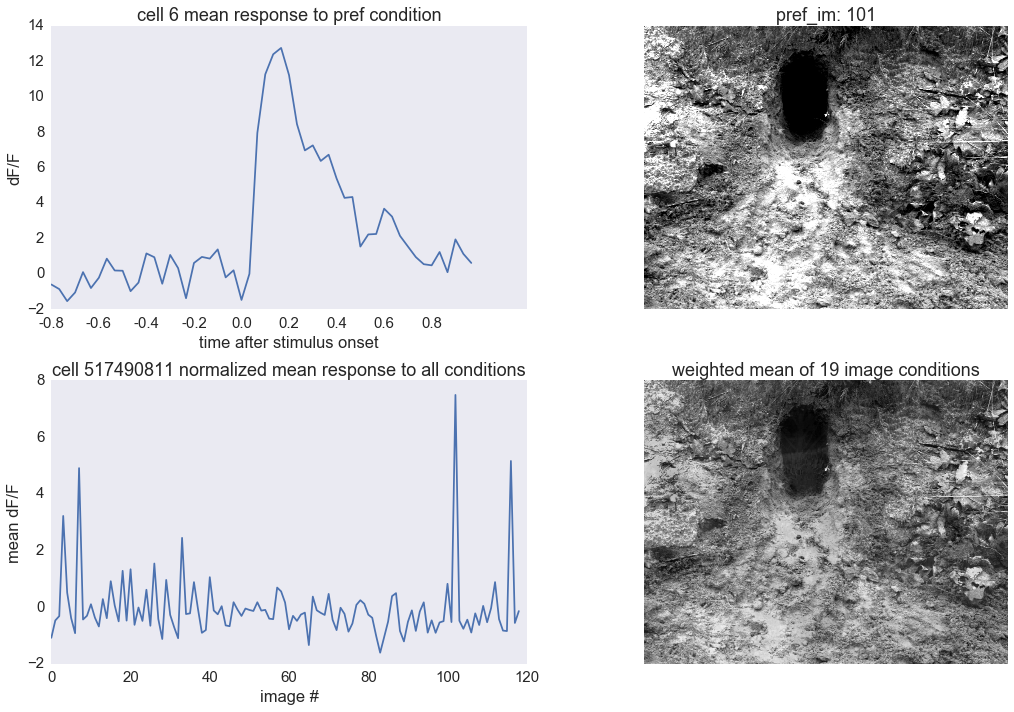

In [49]:
responsive_cell_id = 1
cell_specimen_id = responsive_cells[responsive_cell_id]
plot_ns_summary(cell_specimen_id,responsive_cell_id,ns,images,frames_arr,images_arr,traces_arr,thresh=0.5,weighted=True,save_dir=None)

### plot for all responsive cells & save 

/Users/marinag/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ZeroDivisionError: Weights sum to zero, can't be normalized

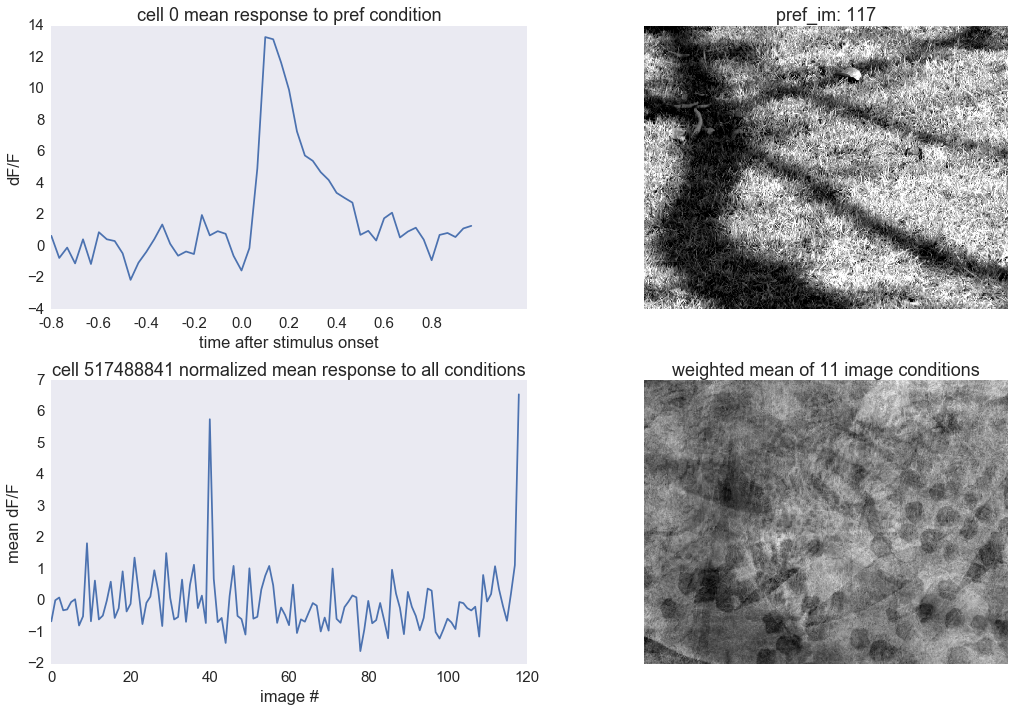

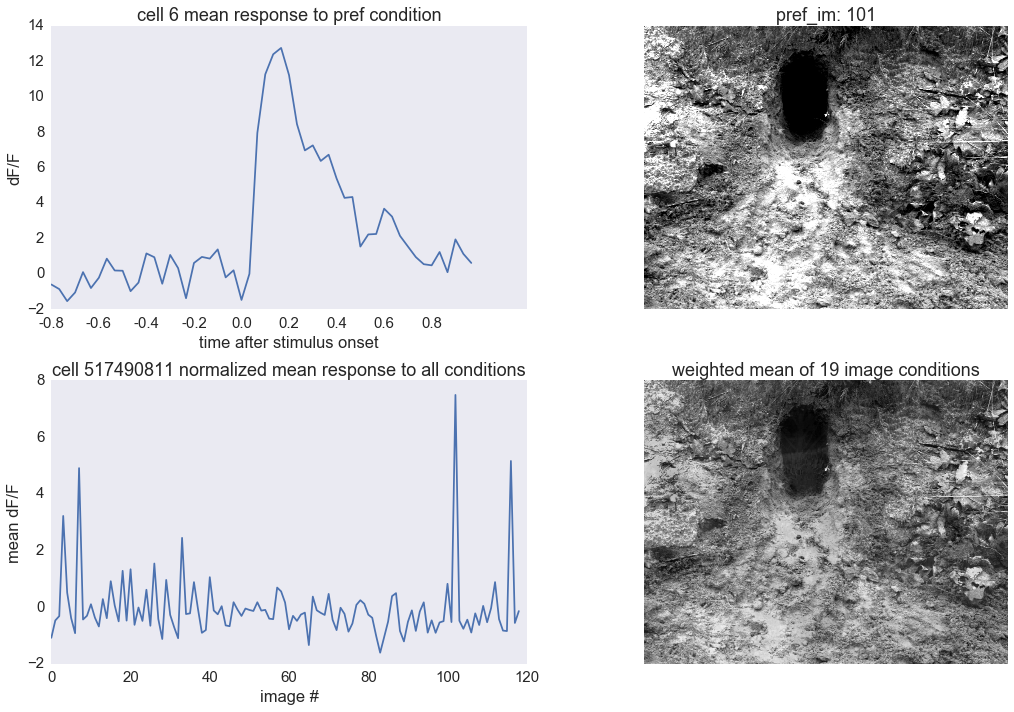

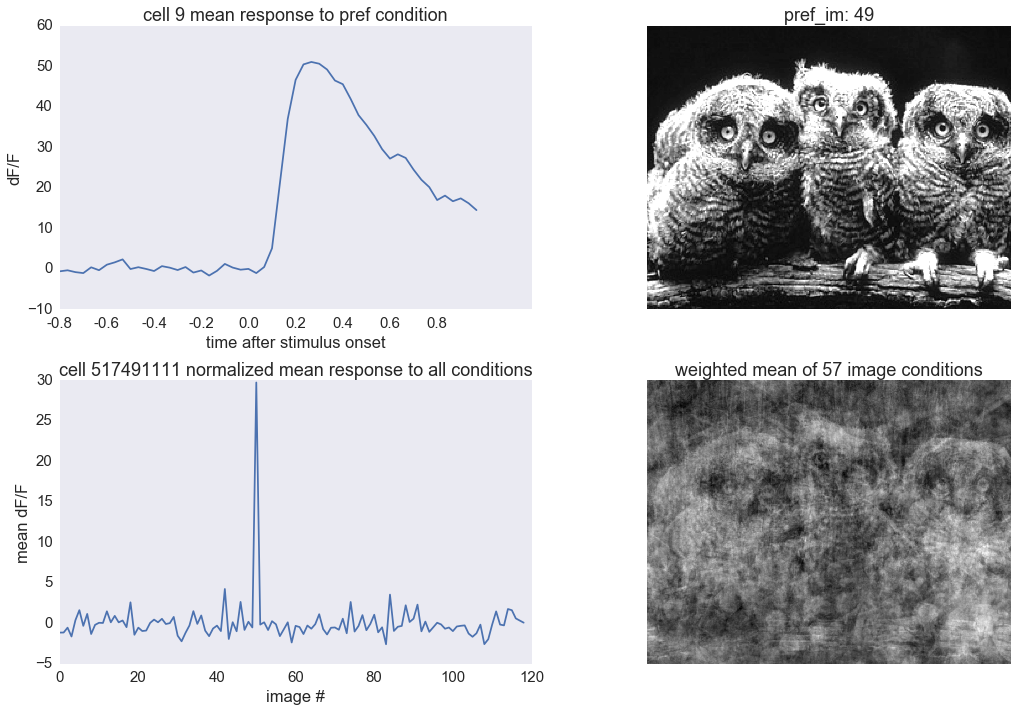

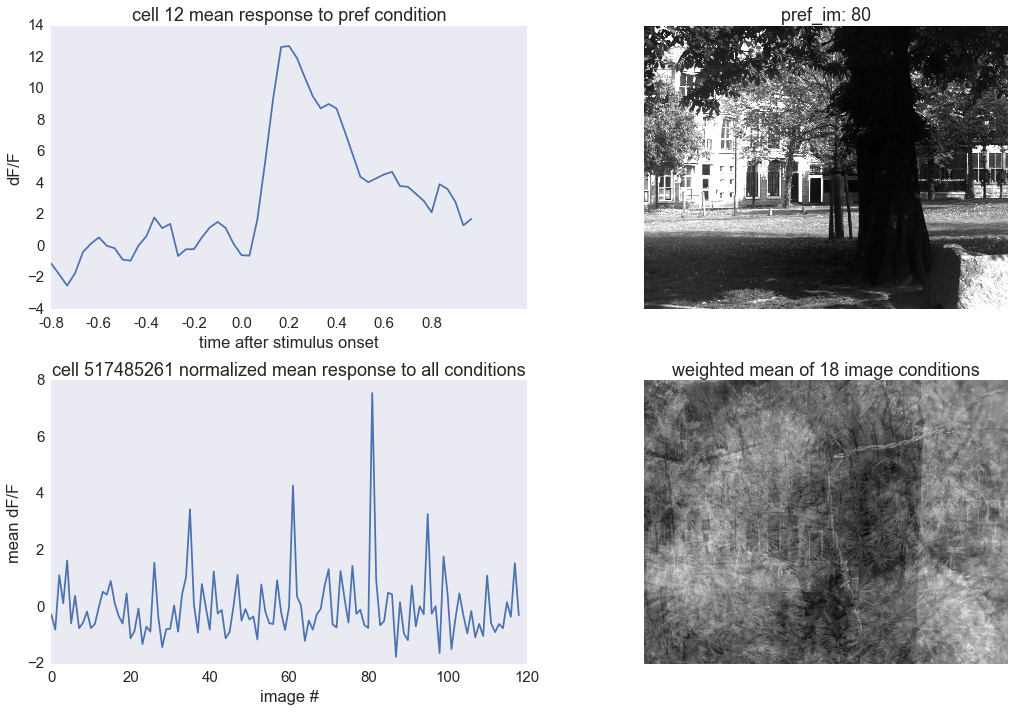

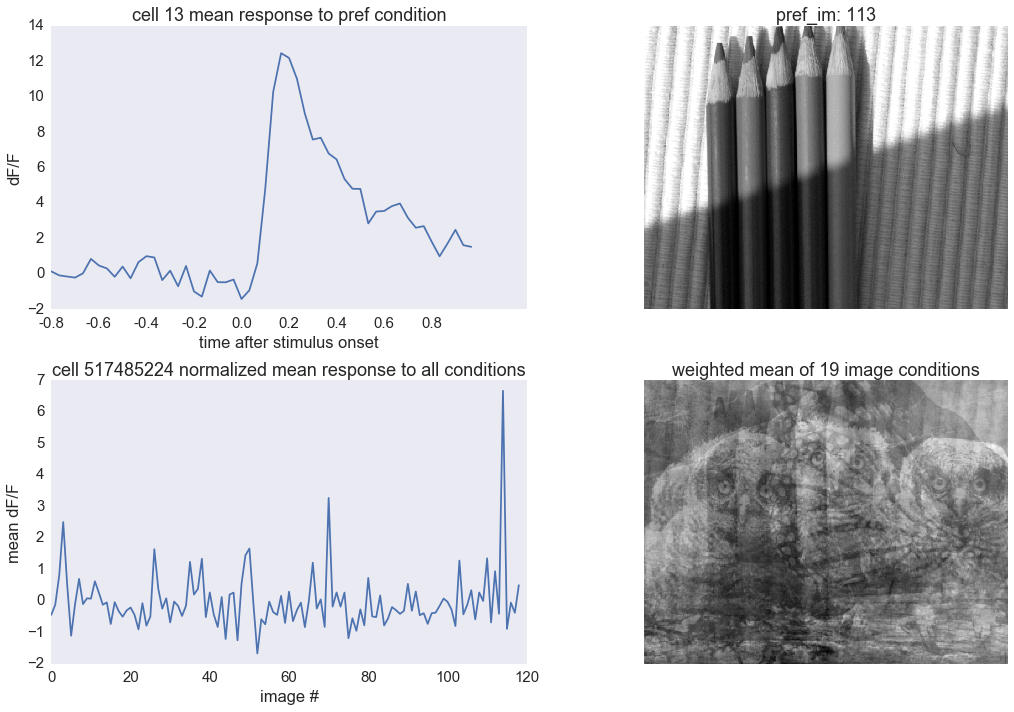

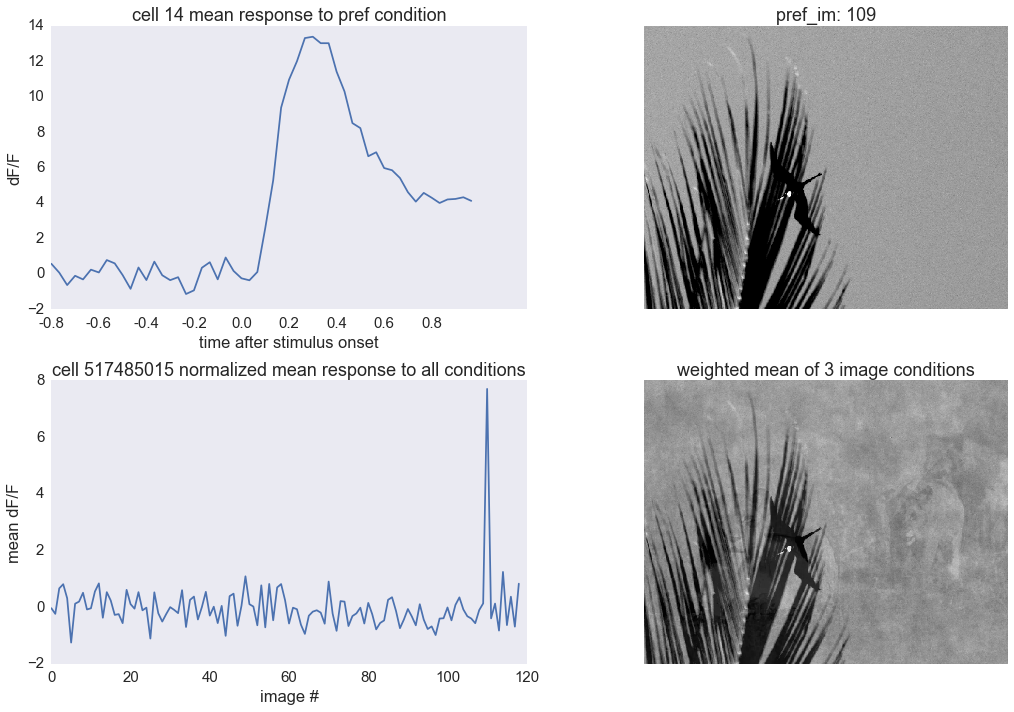

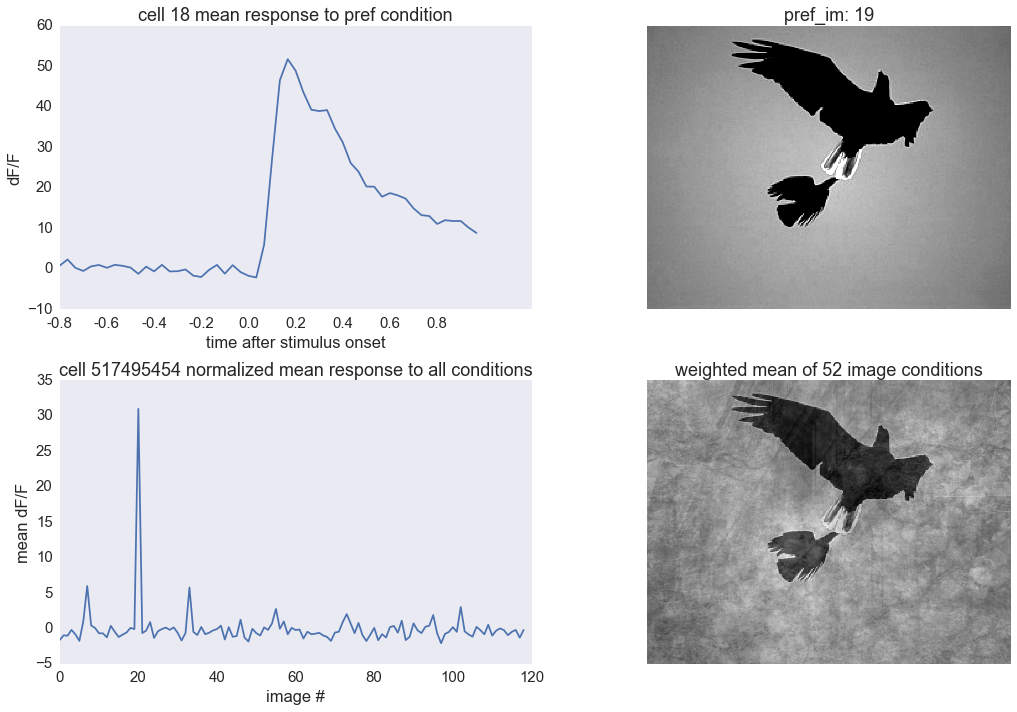

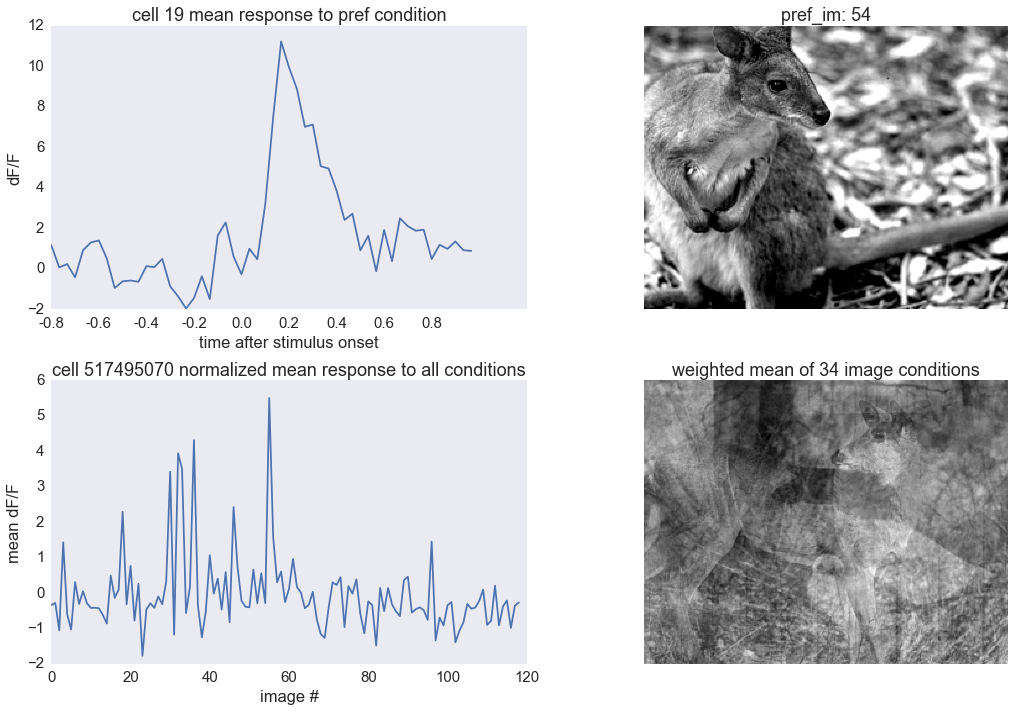

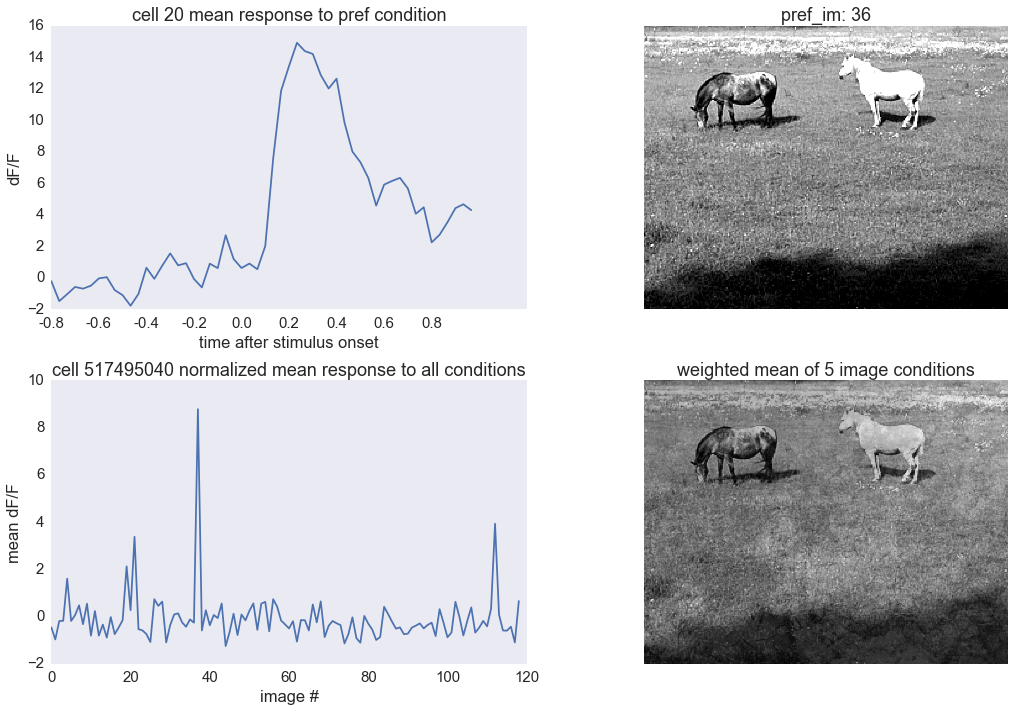

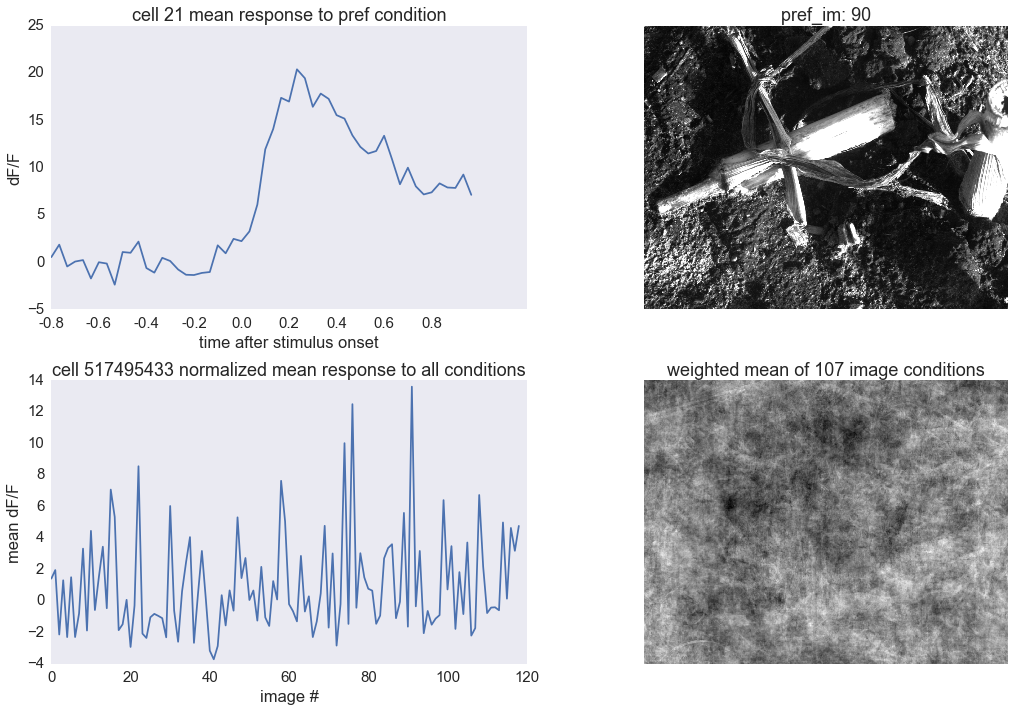

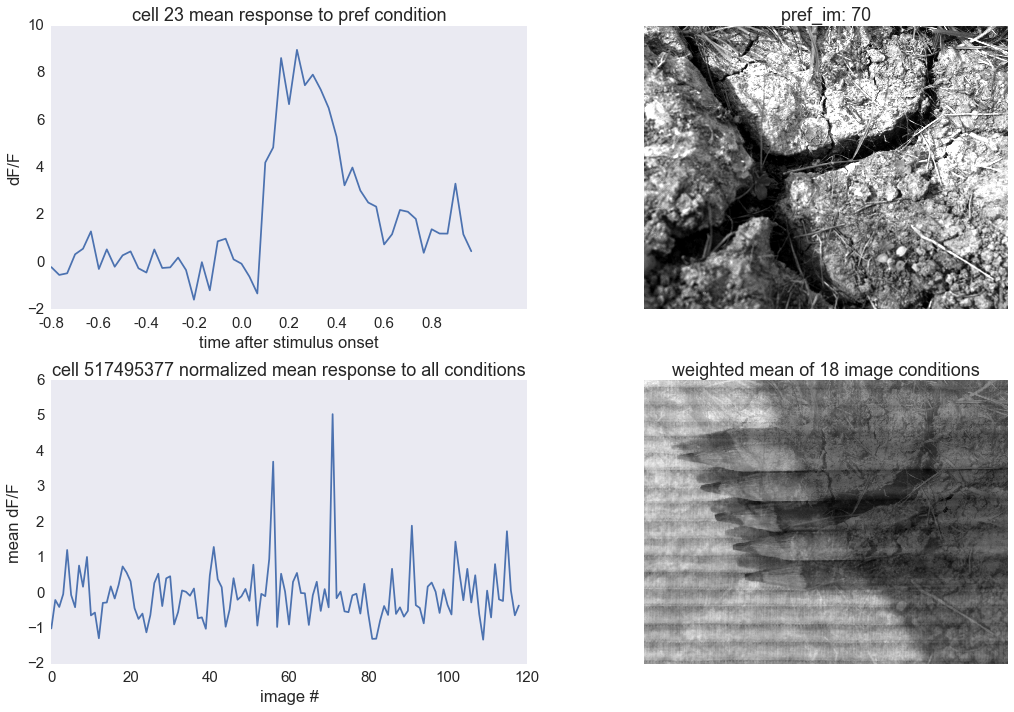

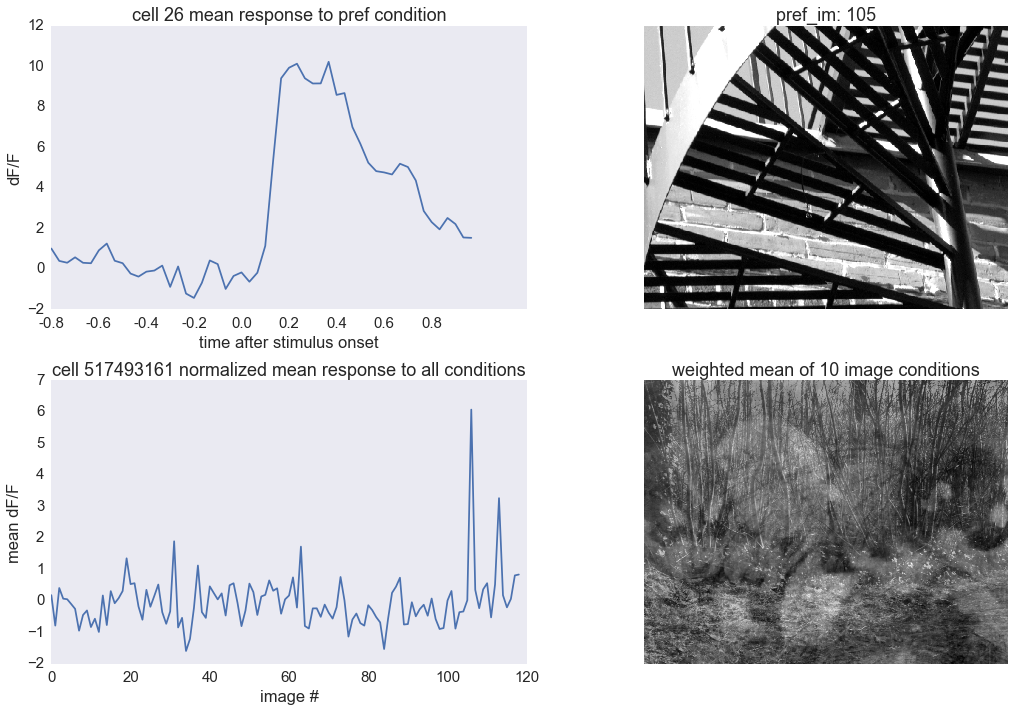

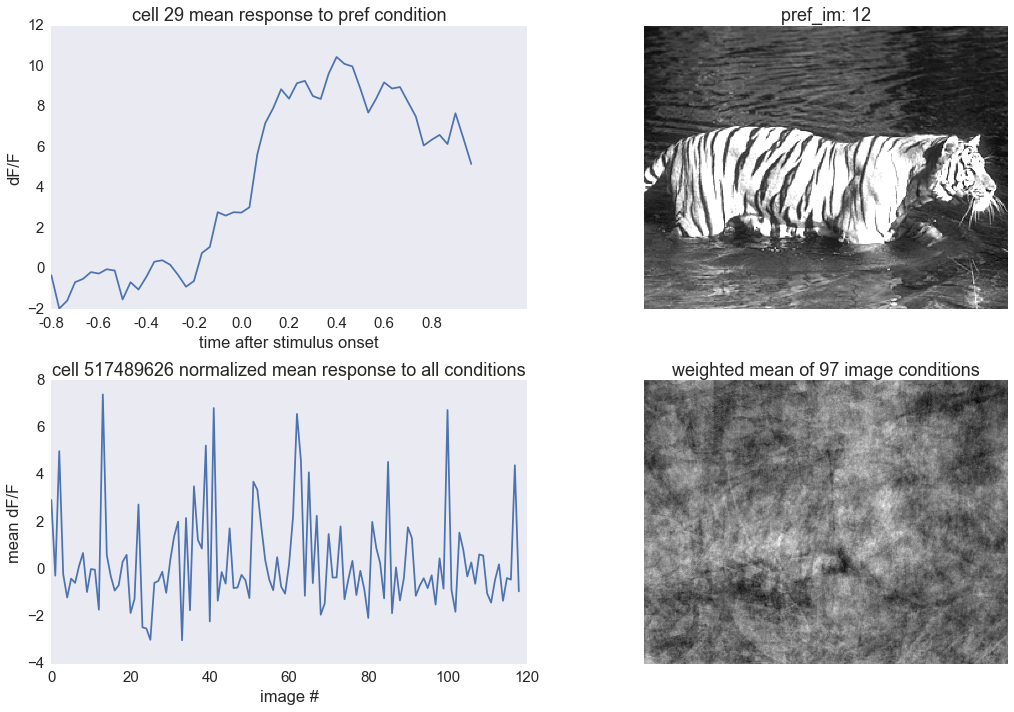

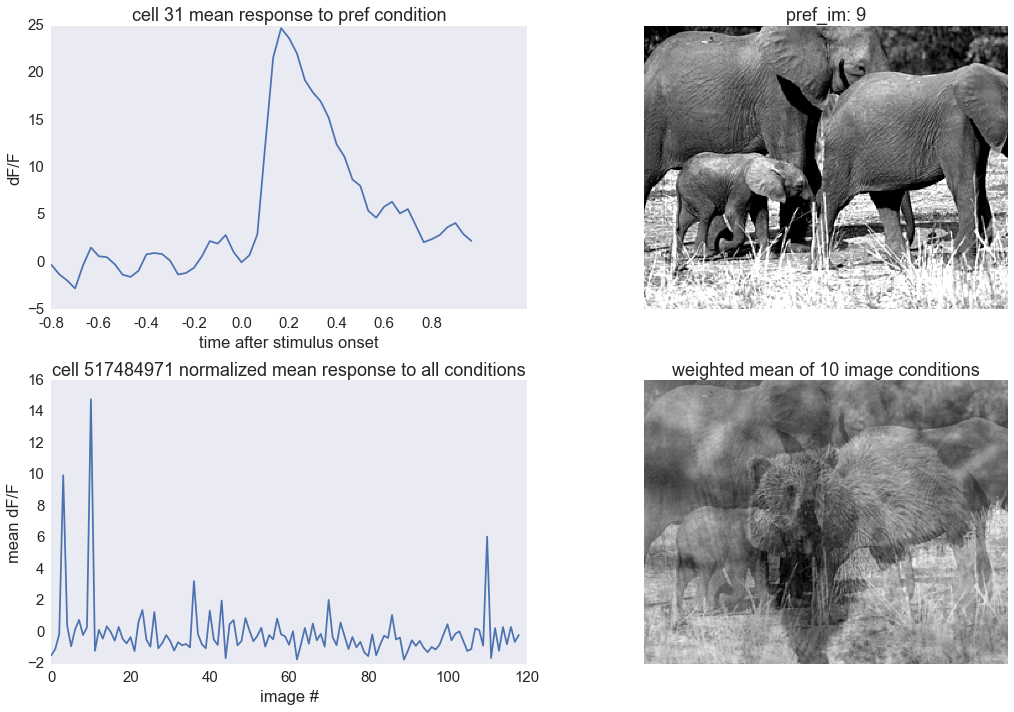

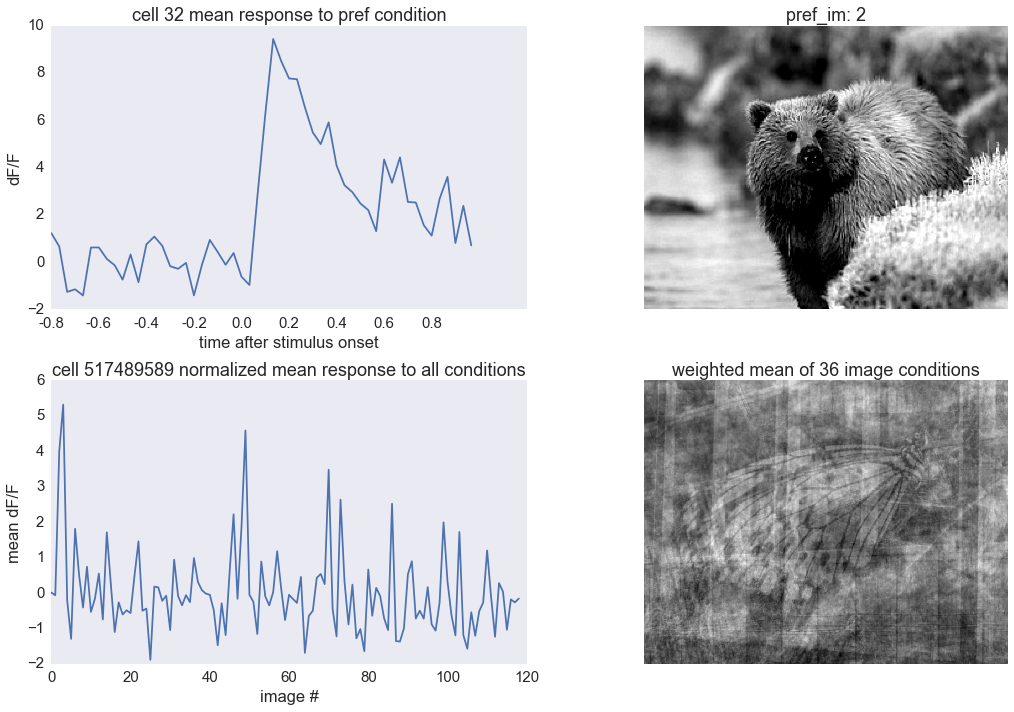

In [50]:
#plot for all responsive cells in this experiment_session
save_dir = os.path.join(r'/Users/marinag/Data/BrainObservatory/natural_scenes_plots/',str(session_id))
for responsive_cell_id, cell_specimen_id in enumerate(responsive_cells):
    plot_ns_summary(cell_specimen_id,responsive_cell_id,ns,images,frames_arr,images_arr,traces_arr,thresh=0.5,weighted=True,save_dir=save_dir)

### compare population response in natural scenes to drifting gratings

In [ ]:
#stimulus specific analysis
from allensdk.brain_observatory.static_gratings import StaticGratings
sg = StaticGratings(data_set)

In [ ]:
help(sg)

In [ ]:
ns.response.shape

In [ ]:
sg.response.shape

In [ ]:
sg.orivals

In [ ]:
sg_response = np.empty(((6*6*4),sg.response.shape[3]))
cond = 0 
for i in range((sg.response.shape[0])):
    for x in range((sg.response.shape[1])):
        for y in range((sg.response.shape[2])):
#             print 'ori:',sg.orivals[i],'sf:',sg.sfvals[x],'phase:',sg.phasevals[y]
            sg_response[cond,:] = sg.response[i,x,y,:,0]
            cond +=1

In [ ]:
fix,ax=plt.subplots(figsize=(15,10))
ax.pcolormesh(sg_response[:,:],cmap='jet',vmin=0,vmax=20)
ax.set_title('population response to static gratings')

In [ ]:
fix,ax=plt.subplots(figsize=(15,10))
ax.pcolormesh(ns.response[:,:,0],cmap='jet',vmin=0,vmax=20)
ax.set_title('population repsonse to natural scenes')